## Introducción

Entrenamiento de modelo preentrenado para resolver el problema de predecir el ángulo del auto en base a la imagen.

Fuertemente basado en:
- https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Imports

In [1]:
import torch
import dataset_modules.image_preloader as image_preloader
import main
import importlib
import dataset_modules.preloaded_one_part_dataset as popd
import training_helper
importlib.reload(training_helper)
importlib.reload(main)
importlib.reload(popd)

<module 'dataset_modules.preloaded_one_part_dataset' from '/clusteruy/home/franco.cuevas/tesis-jupyters/dataset_modules/preloaded_one_part_dataset.py'>

## Variables

In [2]:
FEATURE_EXTRACTION = False

device_string = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_string)

if device_string == "cuda":
    print("Usando GPU!")

Usando GPU!


In [3]:
# preload images
preloaded_images = image_preloader.preload_images(
        images_folder='./dataset_modules/imgs/', 
        state_file='./dataset_modules/state.json', 
        resize_to=224
)

Started to preload images...
Image preloading complete in 1m 19s
The preloaded images use 0.07039642333984375MB of memory


In [4]:
import sklearn
import dataset_modules.common as common
import dataset_modules.preloaded_one_part_dataset as popd
importlib.reload(popd)
importlib.reload(common)

part = "Capot"

dataset = popd.PreloadedOnePartDataset(
    part,
    preloaded_images,
    remove_not_visible=True,
    ignore_repair=True,
)

print(len(dataset.samples))

y = [y_s for (_,y_s,_) in dataset.samples]
balanced_weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes=[0,1], y=y)
balanced_weights = torch.tensor(balanced_weights,dtype=torch.float)

----- CLASS DISTRIBUTION -----
Class: capot_sano, #601, 80.24%
Class: capot_roto, #148, 19.76%
749


In [5]:
print(balanced_weights)

tensor([2.5304, 0.6231])


----- CLASS DISTRIBUTION -----
Class: capot_sano, #601, 80.24%
Class: capot_roto, #148, 19.76%
#TRAIN 599 #TEST 150
Epoch 0/39
----------
train Loss: 0.6943 Main metric (macro_f1): 0.4768 Time: 4.84s
test Loss: 0.6843 Main metric (macro_f1): 0.4968 Time: 0.52s
Epoch 1/39
----------
train Loss: 0.6655 Main metric (macro_f1): 0.5907 Time: 4.42s
test Loss: 0.6751 Main metric (macro_f1): 0.4728 Time: 0.51s
ES Module Best: 0.6750703557332357, BadEpochs: 0
Epoch 2/39
----------
train Loss: 0.6434 Main metric (macro_f1): 0.6013 Time: 4.40s
test Loss: 0.6586 Main metric (macro_f1): 0.5802 Time: 0.51s
ES Module Best: 0.6586101611455282, BadEpochs: 0
Epoch 3/39
----------
train Loss: 0.6036 Main metric (macro_f1): 0.6876 Time: 4.39s
test Loss: 0.6346 Main metric (macro_f1): 0.6637 Time: 0.50s
ES Module Best: 0.634630134900411, BadEpochs: 0
Epoch 4/39
----------
train Loss: 0.5683 Main metric (macro_f1): 0.7454 Time: 4.41s
test Loss: 0.6191 Main metric (macro_f1): 0.6643 Time: 0.51s
ES Module Bes

,class,precision,recall,f1
0,capot_roto,0.650000,0.520,0.577778
1,capot_sano,0.907692,0.944,0.925490


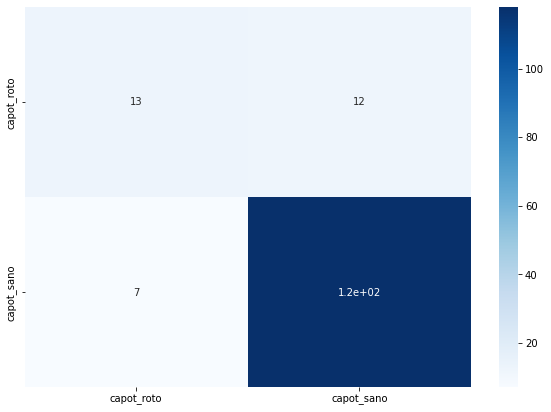

In [6]:
MODEL_NAME = "onepart-resnet50-Capot"
EXPERIMENT_NAME = "onepart-resnet50_Capot-Weighted"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    train_ratio=0.8,
    random_state=42,
    num_epochs=40,
    remove_not_visible=True,
    ignore_repair=True,
    class_weights=balanced_weights,
)

----- CLASS DISTRIBUTION -----
Class: paragolpe_delantero_sano, #475, 63.42%
Class: paragolpe_delantero_roto, #274, 36.58%
#TRAIN 599 #TEST 150
Epoch 0/39
----------
train Loss: 0.6616 Main metric (macro_f1): 0.4277 Time: 4.38s
test Loss: 0.6299 Main metric (macro_f1): 0.4128 Time: 0.51s
Epoch 1/39
----------
train Loss: 0.6478 Main metric (macro_f1): 0.4502 Time: 4.38s
test Loss: 0.6169 Main metric (macro_f1): 0.4870 Time: 0.51s
ES Module Best: 0.6168763868014018, BadEpochs: 0
Epoch 2/39
----------
train Loss: 0.6186 Main metric (macro_f1): 0.4993 Time: 4.39s
test Loss: 0.5987 Main metric (macro_f1): 0.4545 Time: 0.50s
ES Module Best: 0.5987326081593831, BadEpochs: 0
Epoch 3/39
----------
train Loss: 0.6038 Main metric (macro_f1): 0.5208 Time: 4.39s
test Loss: 0.5982 Main metric (macro_f1): 0.6387 Time: 0.50s
ES Module Best: 0.5982000637054443, BadEpochs: 0
Epoch 4/39
----------
train Loss: 0.5832 Main metric (macro_f1): 0.6192 Time: 4.40s
test Loss: 0.5782 Main metric (macro_f1): 0.5

,class,precision,recall,f1
0,paragolpe_delantero_roto,0.821429,0.450980,0.582278
1,paragolpe_delantero_sano,0.770492,0.949495,0.850679


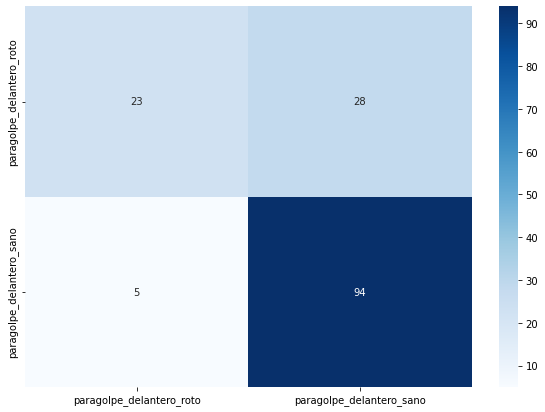

In [25]:
EXPERIMENT_NAME = "resnet50_finetuning-paragolpedel-ignore-notvisible-ignorelow"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    train_ratio=0.8,
    random_state=42,
    num_epochs=40,
    remove_not_visible=True,
    visibility_file="./dataset_modules/analisis_manual_paragolpe.csv"
)

In [32]:
dataset = popd.PreloadedOnePartDataset(
    part,
    preloaded_images,
    remove_not_visible=True,
    visibility_file="./dataset_modules/analisis_manual_paragolpe.csv"
)

print(len(dataset.samples))

y = [y_s for (_,y_s,_) in dataset.samples]
balanced_weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes=[0,1], y=y)
balanced_weights = torch.tensor(balanced_weights,dtype=torch.float)
print(balanced_weights)

----- CLASS DISTRIBUTION -----
Class: paragolpe_delantero_sano, #475, 63.42%
Class: paragolpe_delantero_roto, #274, 36.58%
749
tensor([1.3668, 0.7884])


----- CLASS DISTRIBUTION -----
Class: paragolpe_delantero_sano, #475, 63.42%
Class: paragolpe_delantero_roto, #274, 36.58%
#TRAIN 599 #TEST 150
Epoch 0/39
----------
train Loss: 0.6991 Main metric (macro_f1): 0.5419 Time: 4.37s
test Loss: 0.7213 Main metric (macro_f1): 0.2650 Time: 0.50s
Epoch 1/39
----------
train Loss: 0.6867 Main metric (macro_f1): 0.5353 Time: 4.37s
test Loss: 0.6879 Main metric (macro_f1): 0.4530 Time: 0.50s
ES Module Best: 0.6879219206174215, BadEpochs: 0
Epoch 2/39
----------
train Loss: 0.6576 Main metric (macro_f1): 0.6290 Time: 4.38s
test Loss: 0.6580 Main metric (macro_f1): 0.5711 Time: 0.50s
ES Module Best: 0.6580295205116272, BadEpochs: 0
Epoch 3/39
----------
train Loss: 0.6403 Main metric (macro_f1): 0.6743 Time: 4.38s
test Loss: 0.6626 Main metric (macro_f1): 0.5375 Time: 0.50s
ES Module Best: 0.6580295205116272, BadEpochs: 1
Epoch 4/39
----------
train Loss: 0.6198 Main metric (macro_f1): 0.6784 Time: 4.39s
test Loss: 0.6292 Main metric (macro_f1): 0.6

,class,precision,recall,f1
0,paragolpe_delantero_roto,0.756757,0.549020,0.636364
1,paragolpe_delantero_sano,0.796460,0.909091,0.849057


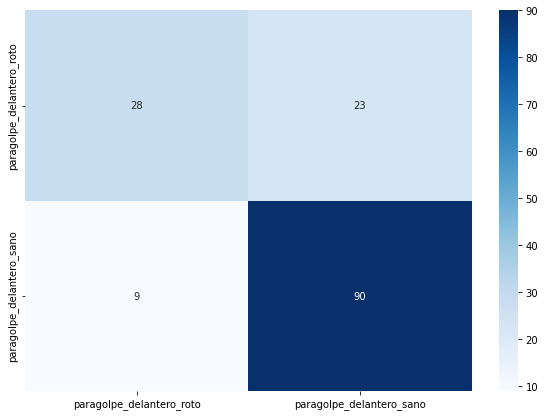

In [42]:
EXPERIMENT_NAME = "resnet50_finetuning-paragolpedel-ignore-notvisible-ignorelow-balanced"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    train_ratio=0.8,
    random_state=42,
    num_epochs=40,
    remove_not_visible=True,
    visibility_file="./dataset_modules/analisis_manual_paragolpe.csv",
    class_weights=balanced_weights
)